<<<64>>>
Fitting model on a small sub-sample of the data
done in 0.210s.
Predicting color indices on the full image (k-means)
done in 0.079s.
Predicting color indices on the full image (random)
done in 0.098s.


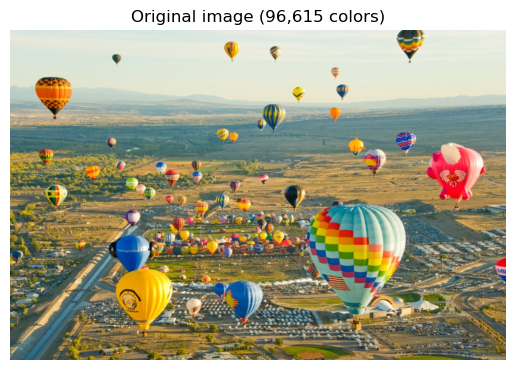

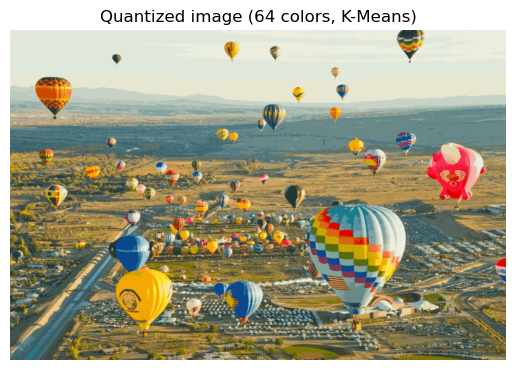

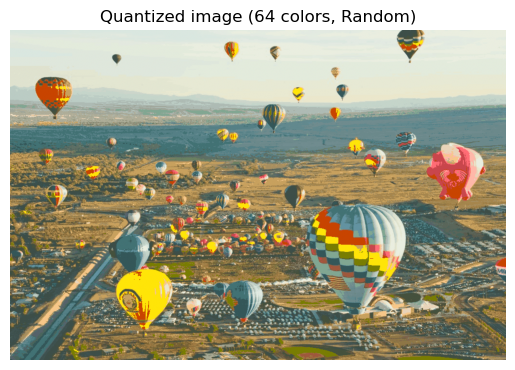

<<<16>>>
Fitting model on a small sub-sample of the data
done in 0.123s.
Predicting color indices on the full image (k-means)
done in 0.030s.
Predicting color indices on the full image (random)
done in 0.043s.


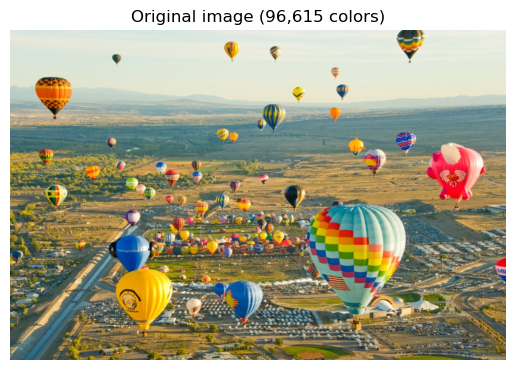

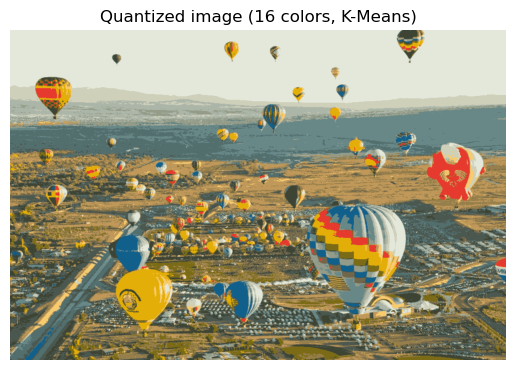

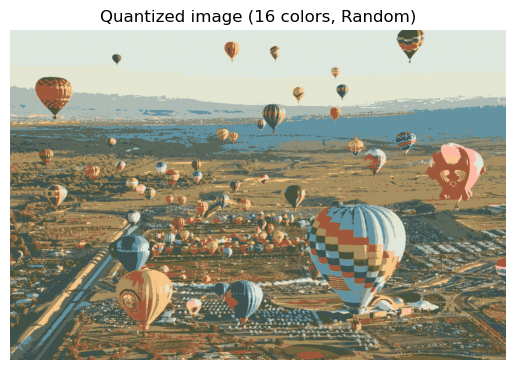

<<<8>>>
Fitting model on a small sub-sample of the data
done in 0.286s.
Predicting color indices on the full image (k-means)
done in 0.013s.
Predicting color indices on the full image (random)
done in 0.015s.


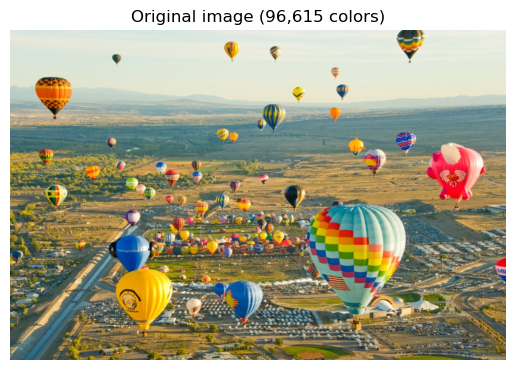

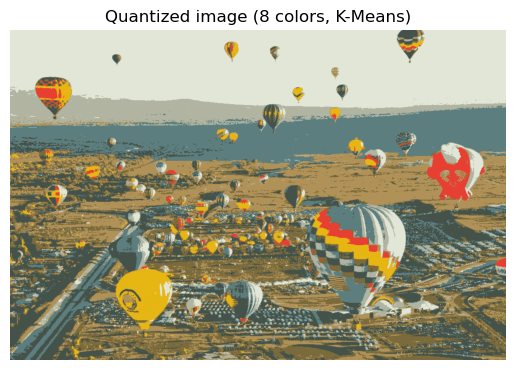

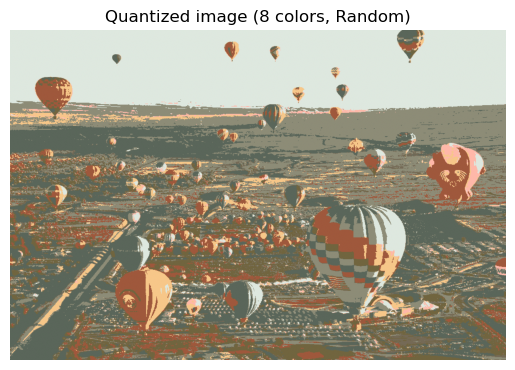

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image


def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

def Quantum(n_colors):
    image = Image.open("Image.jpg")

    image = np.array(image, dtype=np.float64) / 255

    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")

    codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
    print("Predicting color indices on the full image (random)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    print(f"done in {time() - t0:0.3f}s.")

    plt.figure(1)
    plt.clf()
    plt.axis("off")
    plt.title("Original image (96,615 colors)")
    plt.imshow(image)

    plt.figure(2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

    plt.figure(3)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, Random)")
    plt.imshow(recreate_image(codebook_random, labels_random, w, h))
    plt.show()
    
print("<<<64>>>")
Quantum(64)
print("<<<16>>>")
Quantum(16)
print("<<<8>>>")
Quantum(8)